#### diagramm in PRML p72 lower right.

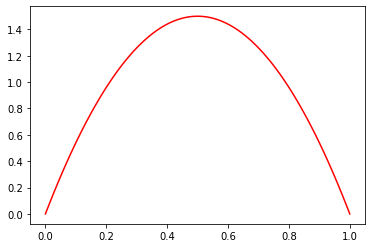

In [46]:
from beta_distribution import *
import matplotlib.pyplot as plt
u = np.linspace(0,1,100)
a = 2
b = 2
dis = [beta(a,b,mu) for mu in u]
plt.plot(u, dis, '-r')
plt.show()
# this dis will be the prior as below

### conduct conjugate process
#### the probability of u will gradually converge to presetting $\mu$ as we expect.

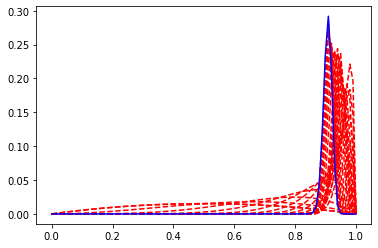

In [47]:
# dataset with mu=0.9
data_num = 30
dataset = np.array([np.random.choice([0,1], p=(0.1,0.9)) for _ in range(data_num)])

prior = np.array([beta(a,b,mu) for mu in u])
prior /= prior.sum() # normalization
Expectation_theta = []
Varaiance_theta = []
for data_length in range(0, len(dataset)):
    m = dataset[:data_length].sum()
    N = len(dataset[:data_length])
    likelihood = np.array([bino_likelihood(m,N,mu) for mu in u])
    likelihood /= likelihood.sum() #normalization
    posterior = prior * likelihood
    #normalization
    posterior /= posterior.sum()
    #calculate expectation of theta
    E_theta = ((posterior*u).sum() * likelihood).sum()
    Expectation_theta.append(E_theta)
    #caculate variance of theta
    first_term = ((posterior*u**2).sum() * likelihood).sum()
    second_term = ((posterior*u).sum() * likelihood).sum() ** 2
    V_theta = first_term - second_term
    Varaiance_theta.append(V_theta)

    plt.plot(u, prior, '--r')
    prior = posterior
plt.plot(u, posterior, '-b')
plt.show()

#### p(x=1|D) calculated by equation 2.19 in PRML P73

In [48]:
probability_distribution = (u * posterior).sum()
print("The probability of next x=1 is {:.3f}".format(probability_distribution))

The probability of next x=1 is 0.907


### variance and mean in P74, we could see with the addition of data points the mean tends to approach setting and variance decreases

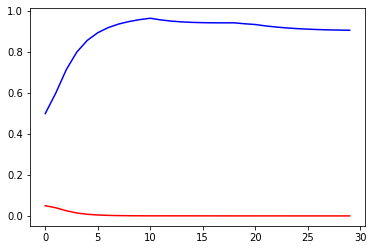

In [49]:
Varaiance_theta = np.array(Varaiance_theta)
Expectation_theta = np.array(Expectation_theta)
plt.plot([i for i in range(data_num)], Expectation_theta, '-b')
plt.plot([i for i in range(data_num)], Varaiance_theta, '-r')